In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

transaction_data_train = pd.read_csv('/home/monica/hdfc_bank_data/train_data/TransactionData_Train.csv')
transaction_data_train.rename(index=str, columns={'C2': 'ID', 'C3': 'Transaction_ID', 'C4': 'Date', 'C5': 'Indicator',\
                                                 'C6': 'Type', 'C8': 'Disbursal_EM_Date', 'C9': 'Transaction_EM_Date', \
                                                 'C10': 'T_Mn', 'C12': 'Amount'}, inplace=True)

print(transaction_data_train.head())
print(transaction_data_train.info())

print(len(list(transaction_data_train['ID'].unique())))

transaction_data_train['Indicator'] = transaction_data_train['Indicator'].map({'D': 0, 'C': 1})
transaction_data_train['Type'],_ = pd.factorize(transaction_data_train['Type'])
transaction_data_train['T_Mn'],_ = pd.factorize(transaction_data_train['T_Mn'])

mask = (transaction_data_train['Indicator'] == 0)
transaction_data_train.ix[mask, 'Amount'] = 0 - transaction_data_train.ix[mask, 'Amount'] 

print(transaction_data_train.head())

training2 = transaction_data_train.groupby('ID')['Type', 'T_Mn', 'Amount'].mean().reset_index()

print(training2.info())


             ID   Transaction_ID              Date Indicator Type  \
0  6UGH4BMM1Y6P  6YPV4HMP1V5EWID  06JUL38:17:31:02         D  IAD   
1   9Y46ZBCWRP9  61CE41JD5YMP329  05MAY38:16:46:36         D  STD   
2   6Z4F3BPVME6  6UQA3CP9F95BOBD  08FEB37:15:55:28         C  OCD   
3  6UYF21TDMPPT   BZF6Z3AJQ55MAM  24NOV38:09:48:37         D  EAW   
4   5N5ASLGMMPM  6IPA43AM4Y613SX  26OCT38:18:54:06         D  ATW   

  Disbursal_EM_Date Transaction_EM_Date   T_Mn   Amount  
0        2038-12-30    30JUL38:00:00:00  OTHER  22000.0  
1        2039-06-31    28MAY38:00:00:00     FT   8183.0  
2        2038-04-31    30FEB37:00:00:00    CHQ  48900.0  
3        2039-05-29    31NOV38:00:00:00    ATM   1500.0  
4        2038-03-31    31OCT38:00:00:00    ATM  10000.0  
<class 'pandas.core.frame.DataFrame'>
Index: 3343745 entries, 0 to 3343744
Data columns (total 9 columns):
ID                     object
Transaction_ID         object
Date                   object
Indicator              object
Type      

/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


             ID   Transaction_ID              Date  Indicator  Type  \
0  6UGH4BMM1Y6P  6YPV4HMP1V5EWID  06JUL38:17:31:02          0     0   
1   9Y46ZBCWRP9  61CE41JD5YMP329  05MAY38:16:46:36          0     1   
2   6Z4F3BPVME6  6UQA3CP9F95BOBD  08FEB37:15:55:28          1     2   
3  6UYF21TDMPPT   BZF6Z3AJQ55MAM  24NOV38:09:48:37          0     3   
4   5N5ASLGMMPM  6IPA43AM4Y613SX  26OCT38:18:54:06          0     4   

  Disbursal_EM_Date Transaction_EM_Date  T_Mn   Amount  
0        2038-12-30    30JUL38:00:00:00     0 -22000.0  
1        2039-06-31    28MAY38:00:00:00     1  -8183.0  
2        2038-04-31    30FEB37:00:00:00     2  48900.0  
3        2039-05-29    31NOV38:00:00:00     3  -1500.0  
4        2038-03-31    31OCT38:00:00:00     3 -10000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25673 entries, 0 to 25672
Data columns (total 4 columns):
ID        25673 non-null object
Type      25673 non-null float64
T_Mn      25673 non-null float64
Amount    25673 non-null 

In [81]:
common_data = pd.read_csv('/home/monica/hdfc_bank_data/train_data/AggregateData_Train.csv')  

common_data.rename(index=str, columns={'V2': 'ID', 'V3': 'Amt_1', 'V4': 'Amt_2', 'V5': 'Amt_3',\
                                             'V6': 'Amt_4', 'V7': 'Amt_5', 'V8': 'Amt_6','V9': 'Amt_7', 'V10': 'Amt_8', 'V11': 'Amt_9',\
                                             'V12': 'Amt_10', 'V13': 'Amt_11', 'V14': 'Amt_12', 'V15': 'Amt_13', 'V16': 'Amt_14', 'V17': 'Amt_15',\
                                             'V18': 'Amt_16', 'V19': 'Cnt_1', 'V20': 'Cnt_2','V21': 'Cnt_3', 'V22': 'Cnt_4', 'V23': 'Cnt_5', \
                                             'V24': 'Cnt_6', 'V25': 'Cnt_7', 'V26': 'Cnt_8','V27': 'Cnt_9', 'V28': 'Cnt_10', 'V29': 'Cnt_11', \
                                             'V30': 'Cnt_12', 'V31': 'Cnt_13', 'V32': 'Cnt_14','V33': 'Cnt_15', 'V34': 'Cnt_16', 'V35': 'Amt_17', \
                                             'V36': 'Amt_18', 'V37': 'Amt_19', 'V38': 'Cnt_17','V39': 'Cnt_18', 'V40': 'Cnt_19', 'V41': 'R_1', \
                                             'V42': 'R_2', 'V43': 'P_1', 'V44': 'P_2','V45': 'P_3', 'V46': 'P_4', 'V47': 'P_5', \
                                             'V48': 'P_6', 'V49': 'P_7', 'V50': 'Cnt_20','V51': 'Cnt_21', 'V52': 'Cnt_22', 'V53': 'Cnt_23',\
                                             'bad_flag': 'Bad_Flag'}, inplace=True)

#print(aggregate_data_train.head())
#print(aggregate_data_train.info())

#print(len(list(aggregate_data_train['ID'].unique())))




Converting object type to numeric

In [82]:
common_data['Amt_1'] = common_data['Amt_1'].map({'?': 0})
common_data['Amt_2'] = common_data['Amt_2'].map({'?': 0})
common_data['Amt_3'] = common_data['Amt_3'].map({'?': 0})
common_data['Amt_4'] = common_data['Amt_4'].map({'?': 0})
common_data['Amt_5'] = common_data['Amt_5'].map({'?': 0})
common_data['Amt_6'] = common_data['Amt_6'].map({'?': 0})
common_data['Amt_7'] = common_data['Amt_7'].map({'?': 0})
common_data['Amt_8'] = common_data['Amt_8'].map({'?': 0})
common_data['Amt_9'] = common_data['Amt_9'].map({'?': 0})
common_data['Amt_10'] = common_data['Amt_10'].map({'?': 0})
common_data['Amt_11'] = common_data['Amt_11'].map({'?': 0})
common_data['Amt_12'] = common_data['Amt_12'].map({'?': 0})
common_data['Amt_13'] = common_data['Amt_13'].map({'?': 0})
common_data['Amt_14'] = common_data['Amt_14'].map({'?': 0})
common_data['Amt_15'] = common_data['Amt_15'].map({'?': 0})
common_data['Amt_16'] = common_data['Amt_16'].map({'?': 0})
common_data['Amt_17'] = common_data['Amt_17'].map({'?': 0})
common_data['Amt_18'] = common_data['Amt_18'].map({'?': 0})
common_data['Amt_19'] = common_data['Amt_19'].map({'?': 0})


common_data['Amt_1'] = pd.to_numeric(common_data['Amt_1'])
common_data['Amt_2'] = pd.to_numeric(common_data['Amt_2'])
common_data['Amt_3'] = pd.to_numeric(common_data['Amt_3'])
common_data['Amt_4'] = pd.to_numeric(common_data['Amt_4'])
common_data['Amt_5'] = pd.to_numeric(common_data['Amt_5'])
common_data['Amt_6'] = pd.to_numeric(common_data['Amt_6'])
common_data['Amt_7'] = pd.to_numeric(common_data['Amt_7'])
common_data['Amt_8'] = pd.to_numeric(common_data['Amt_8'])
common_data['Amt_9'] = pd.to_numeric(common_data['Amt_9'])
common_data['Amt_10'] = pd.to_numeric(common_data['Amt_10'])
common_data['Amt_11'] = pd.to_numeric(common_data['Amt_11'])
common_data['Amt_12'] = pd.to_numeric(common_data['Amt_12'])
common_data['Amt_13'] = pd.to_numeric(common_data['Amt_13'])
common_data['Amt_14'] = pd.to_numeric(common_data['Amt_14'])
common_data['Amt_15'] = pd.to_numeric(common_data['Amt_15'])
common_data['Amt_16'] = pd.to_numeric(common_data['Amt_16'])
common_data['Amt_17'] = pd.to_numeric(common_data['Amt_17'])
common_data['Amt_18'] = pd.to_numeric(common_data['Amt_18'])
common_data['Amt_19'] = pd.to_numeric(common_data['Amt_19'])

common_data['Cnt_1'] = common_data['Cnt_1'].map({'?': 0})
common_data['Cnt_2'] = common_data['Cnt_2'].map({'?': 0})
common_data['Cnt_3'] = common_data['Cnt_3'].map({'?': 0})
common_data['Cnt_4'] = common_data['Cnt_4'].map({'?': 0})
common_data['Cnt_5'] = common_data['Cnt_5'].map({'?': 0})
common_data['Cnt_6'] = common_data['Cnt_6'].map({'?': 0})
common_data['Cnt_7'] = common_data['Cnt_7'].map({'?': 0})
common_data['Cnt_8'] = common_data['Cnt_8'].map({'?': 0})
common_data['Cnt_9'] = common_data['Cnt_9'].map({'?': 0})
common_data['Cnt_10'] = common_data['Cnt_10'].map({'?': 0})
common_data['Cnt_11'] = common_data['Cnt_11'].map({'?': 0})
common_data['Cnt_12'] = common_data['Cnt_12'].map({'?': 0})
common_data['Cnt_13'] = common_data['Cnt_13'].map({'?': 0})
common_data['Cnt_14'] = common_data['Cnt_14'].map({'?': 0})
common_data['Cnt_15'] = common_data['Cnt_15'].map({'?': 0})
common_data['Cnt_16'] = common_data['Cnt_16'].map({'?': 0})
common_data['Cnt_17'] = common_data['Cnt_17'].map({'?': 0})
common_data['Cnt_18'] = common_data['Cnt_18'].map({'?': 0})
common_data['Cnt_19'] = common_data['Cnt_19'].map({'?': 0})
common_data['Cnt_20'] = common_data['Cnt_20'].map({'?': 0})
common_data['Cnt_21'] = common_data['Cnt_21'].map({'?': 0})
common_data['Cnt_22'] = common_data['Cnt_22'].map({'?': 0})
common_data['Cnt_23'] = common_data['Cnt_23'].map({'?': 0})

common_data['R_1'] = common_data['R_1'].map({'?': 0})
common_data['R_2'] = common_data['R_2'].map({'?': 0})
common_data['P_1'] = common_data['P_1'].map({'?': 0})
common_data['P_2'] = common_data['P_2'].map({'?': 0})
common_data['P_3'] = common_data['P_3'].map({'?': 0})
common_data['P_4'] = common_data['P_4'].map({'?': 0})
common_data['P_5'] = common_data['P_5'].map({'?': 0})
common_data['P_6'] = common_data['P_6'].map({'?': 0})
common_data['P_7'] = common_data['P_7'].map({'?': 0})

common_data['Cnt_1'] = pd.to_numeric(common_data['Cnt_1'])
common_data['Cnt_2'] = pd.to_numeric(common_data['Cnt_2'])
common_data['Cnt_3'] = pd.to_numeric(common_data['Cnt_3'])
common_data['Cnt_4'] = pd.to_numeric(common_data['Cnt_4'])
common_data['Cnt_5'] = pd.to_numeric(common_data['Cnt_5'])
common_data['Cnt_6'] = pd.to_numeric(common_data['Cnt_6'])
common_data['Cnt_7'] = pd.to_numeric(common_data['Cnt_7'])
common_data['Cnt_8'] = pd.to_numeric(common_data['Cnt_8'])
common_data['Cnt_9'] = pd.to_numeric(common_data['Cnt_9'])
common_data['Cnt_10'] = pd.to_numeric(common_data['Cnt_10'])
common_data['Cnt_11'] = pd.to_numeric(common_data['Cnt_11'])
common_data['Cnt_12'] = pd.to_numeric(common_data['Cnt_12'])
common_data['Cnt_13'] = pd.to_numeric(common_data['Cnt_13'])
common_data['Cnt_14'] = pd.to_numeric(common_data['Cnt_14'])
common_data['Cnt_15'] = pd.to_numeric(common_data['Cnt_15'])
common_data['Cnt_16'] = pd.to_numeric(common_data['Cnt_16'])
common_data['Cnt_17'] = pd.to_numeric(common_data['Cnt_17'])
common_data['Cnt_18'] = pd.to_numeric(common_data['Cnt_18'])
common_data['Cnt_19'] = pd.to_numeric(common_data['Cnt_19'])
common_data['Cnt_20'] = pd.to_numeric(common_data['Cnt_20'])
common_data['Cnt_21'] = pd.to_numeric(common_data['Cnt_21'])
common_data['Cnt_22'] = pd.to_numeric(common_data['Cnt_22'])
common_data['Cnt_23'] = pd.to_numeric(common_data['Cnt_23'])




common_data['R_1'] = pd.to_numeric(common_data['R_1'])
common_data['R_2'] = pd.to_numeric(common_data['R_2'])
common_data['P_1'] = pd.to_numeric(common_data['P_1'])
common_data['P_2'] = pd.to_numeric(common_data['P_2'])
common_data['P_3'] = pd.to_numeric(common_data['P_3'])
common_data['P_4'] = pd.to_numeric(common_data['P_4'])
common_data['P_5'] = pd.to_numeric(common_data['P_5'])
common_data['P_6'] = pd.to_numeric(common_data['P_6'])
common_data['P_7'] = pd.to_numeric(common_data['P_7'])

print(common_data.head())

    UID           ID  Amt_1  Amt_2  Amt_3  Amt_4  Amt_5  Amt_6  Amt_7  Amt_8  \
0  Tr-1  61P4S1M3GET    NaN    0.0    0.0    0.0    0.0    0.0    0.0    NaN   
1  Tr-2  6NYVS1J3U7M    0.0    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
2  Tr-3   BLFB1KMS48    NaN    NaN    0.0    0.0    NaN    0.0    0.0    NaN   
3  Tr-4   MYGB1LCW8P    0.0    NaN    NaN    0.0    0.0    0.0    0.0    0.0   
4  Tr-5  6UG5S1PQGE5    NaN    NaN    0.0    0.0    0.0    0.0    NaN    NaN   

     ...     P_3  P_4  P_5  P_6  P_7  Cnt_20  Cnt_21  Cnt_22  Cnt_23  Bad_Flag  
0    ...     0.0  NaN  0.0  0.0  0.0     NaN     NaN     NaN     NaN         0  
1    ...     0.0  0.0  0.0  0.0  0.0     NaN     0.0     0.0     0.0         0  
2    ...     0.0  0.0  0.0  0.0  0.0     NaN     NaN     NaN     NaN         0  
3    ...     0.0  0.0  0.0  0.0  0.0     NaN     NaN     0.0     NaN         0  
4    ...     0.0  NaN  0.0  0.0  NaN     NaN     NaN     NaN     NaN         0  

[5 rows x 54 columns]


In [83]:
print(common_data.describe())

         Amt_1   Amt_2    Amt_3    Amt_4    Amt_5    Amt_6    Amt_7    Amt_8  \
count  15889.0  5696.0  26020.0  25415.0  24835.0  26741.0  26369.0  24970.0   
mean       0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         Amt_9   Amt_10      ...           P_3      P_4      P_5      P_6  \
count  23424.0  25843.0      ...       26068.0  21679.0  26473.0  26741.0   
mean       0.0      0.0      ...           0.0      0.0      0.0      0.0   
std        0.0      0.0      ...           0.0  

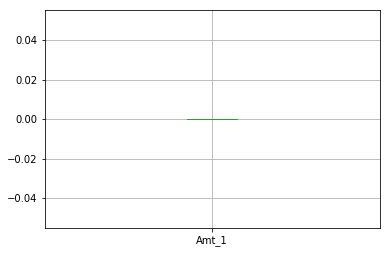

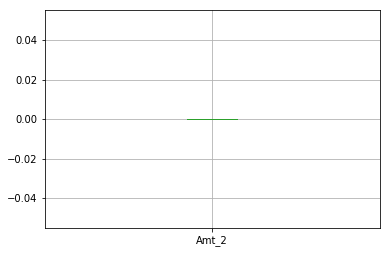

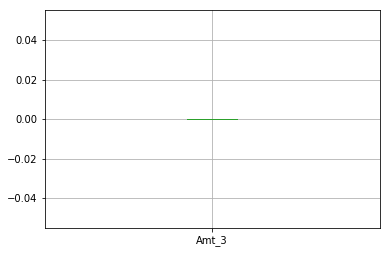

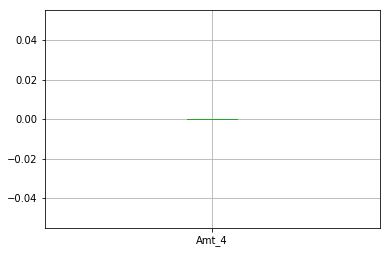

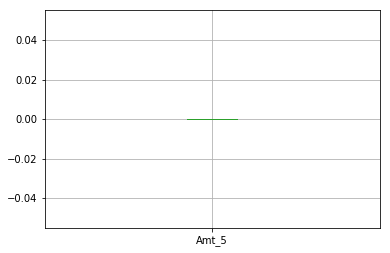

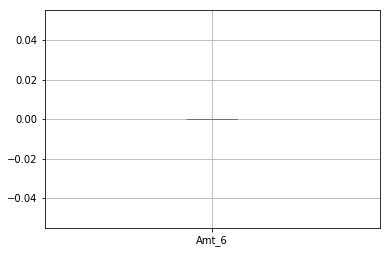

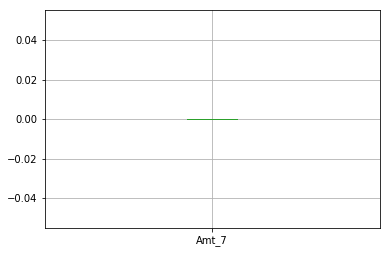

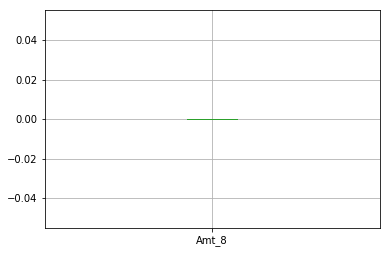

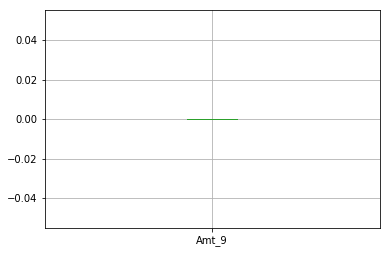

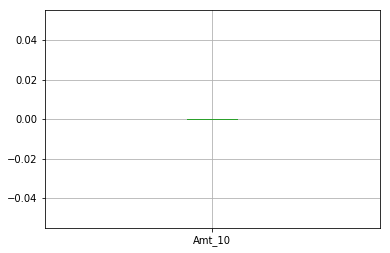

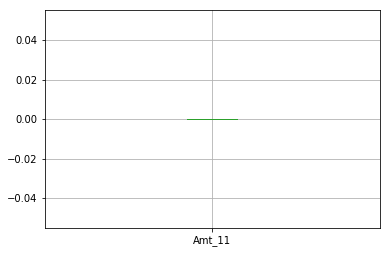

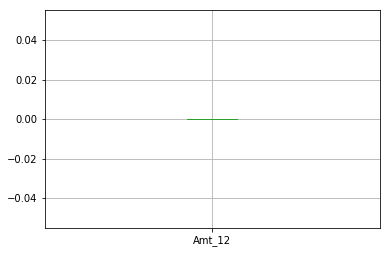

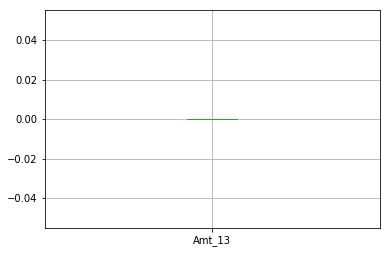

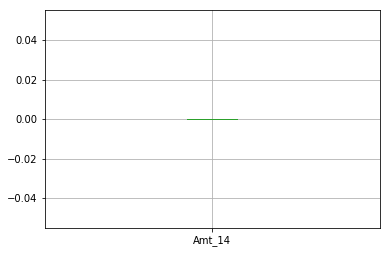

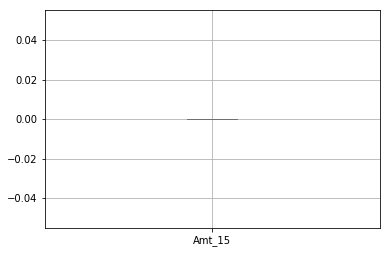

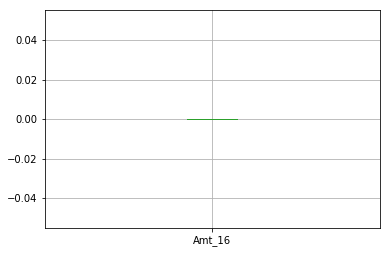

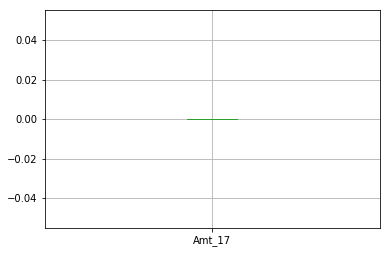

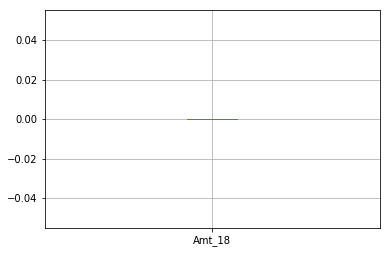

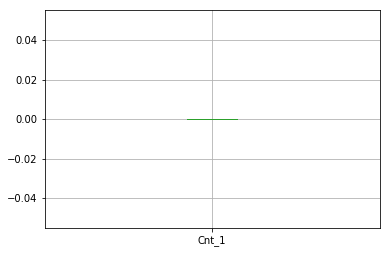

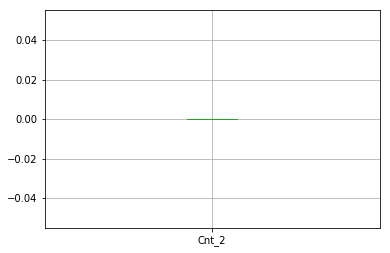

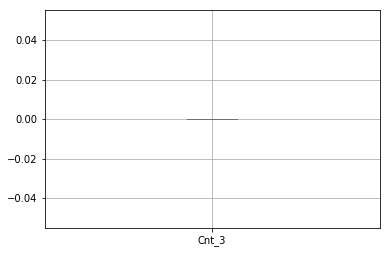

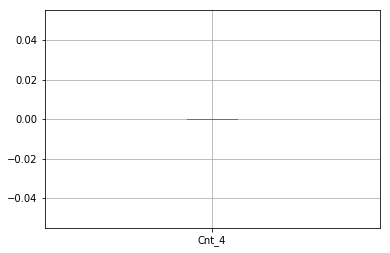

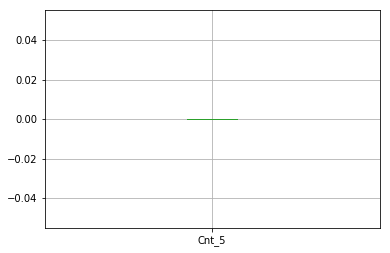

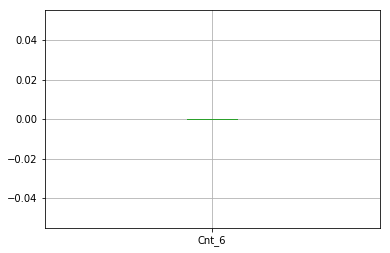

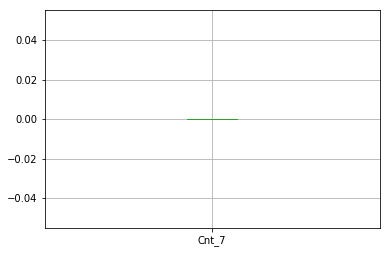

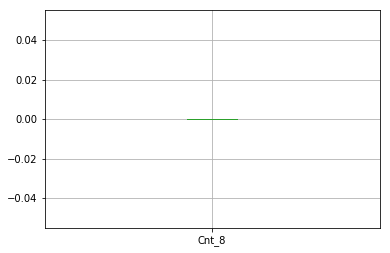

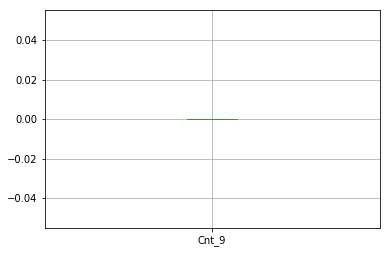

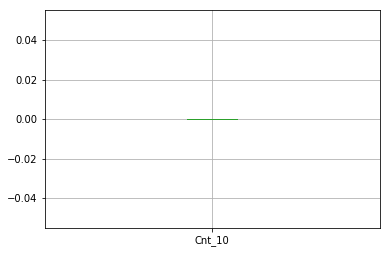

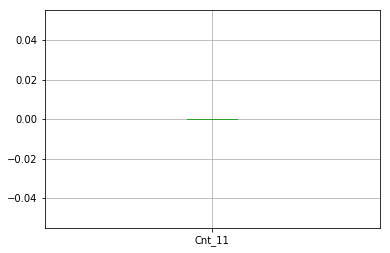

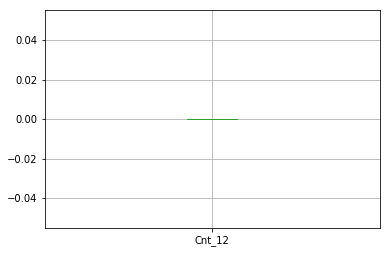

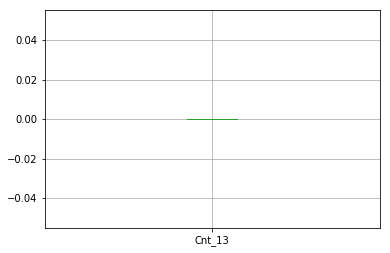

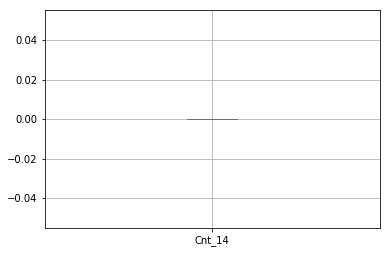

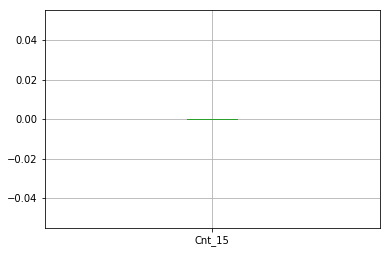

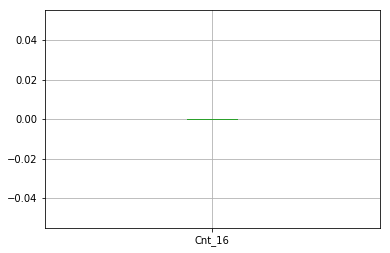

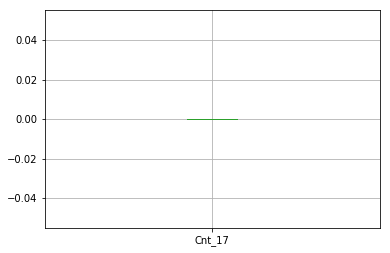

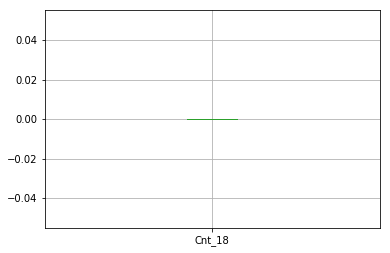

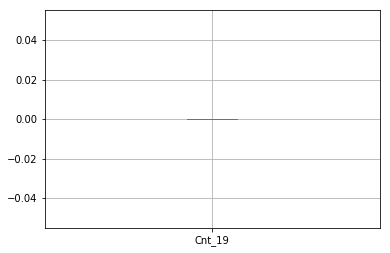

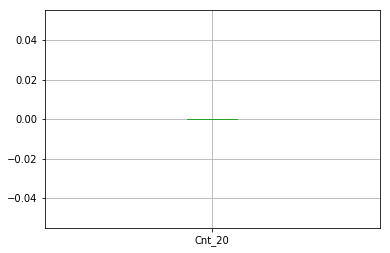

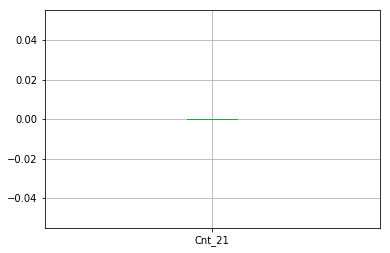

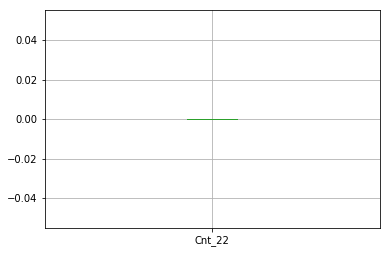

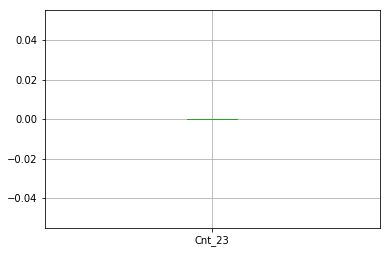

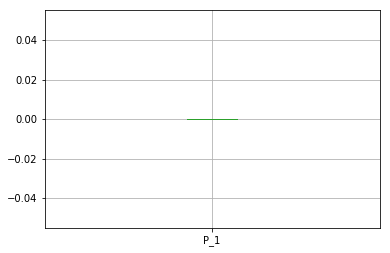

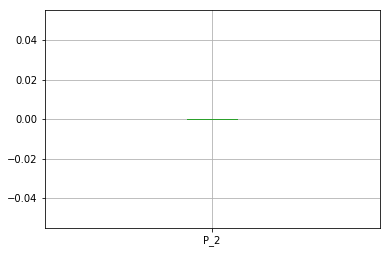

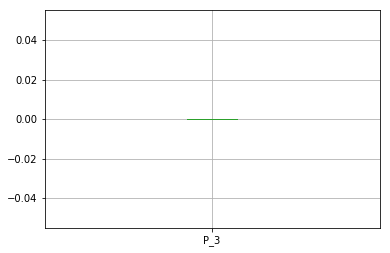

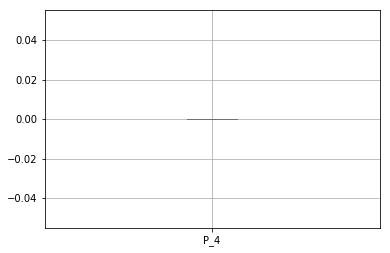

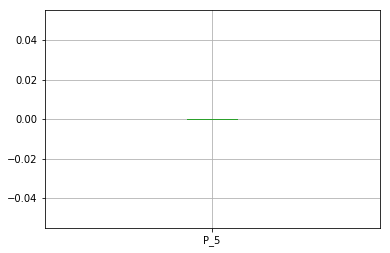

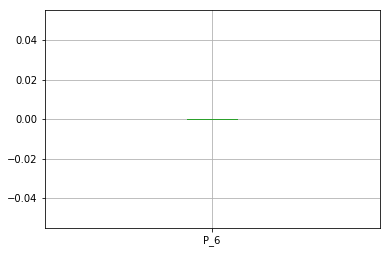

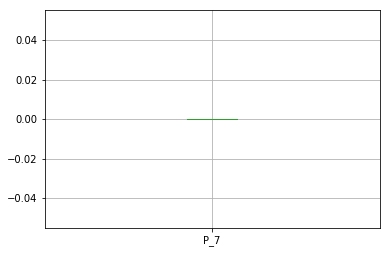

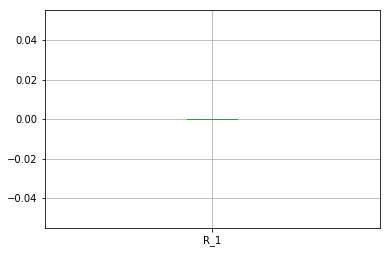

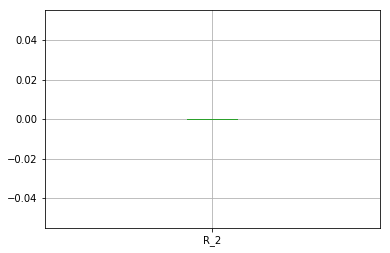

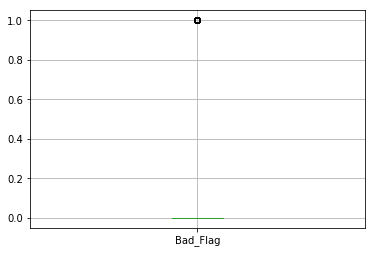

In [84]:
columns = ['Amt_1', 'Amt_2', 'Amt_3', 'Amt_4', 'Amt_5', 'Amt_6', \
                                        'Amt_7', 'Amt_8', 'Amt_9', 'Amt_10', 'Amt_11', 'Amt_12', \
                                        'Amt_13', 'Amt_14', 'Amt_15', 'Amt_16', 'Amt_17', 'Amt_18', \
                                        'Cnt_1', 'Cnt_2', 'Cnt_3', 'Cnt_4', 'Cnt_5', 'Cnt_6', \
                                        'Cnt_7', 'Cnt_8', 'Cnt_9', 'Cnt_10', 'Cnt_11', 'Cnt_12', \
                                        'Cnt_13', 'Cnt_14', 'Cnt_15', 'Cnt_16', 'Cnt_17', 'Cnt_18', \
                                        'Cnt_19', 'Cnt_20', 'Cnt_21', 'Cnt_22', 'Cnt_23', 'P_1', 'P_2', \
                                        'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'R_1', 'R_2', 'Bad_Flag']
for col in columns:
    common_data.boxplot(column=col, return_type='axes');
    
    plt.show()

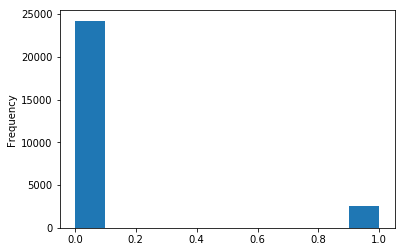

In [85]:
common_data['Bad_Flag'].plot.hist()

In [86]:



train_agg_2 = common_data.groupby(['ID','UID'])['Bad_Flag'].mean().reset_index()

print(train_agg_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 3 columns):
ID          26775 non-null object
UID         26775 non-null object
Bad_Flag    26775 non-null int64
dtypes: int64(1), object(2)
memory usage: 627.6+ KB
None


In [87]:
print(training2.info())
print(train_agg_2.info())
merged_data = pd.merge(training2, train_agg_2, on='ID')
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25673 entries, 0 to 25672
Data columns (total 4 columns):
ID        25673 non-null object
Type      25673 non-null float64
T_Mn      25673 non-null float64
Amount    25673 non-null float64
dtypes: float64(3), object(1)
memory usage: 802.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 3 columns):
ID          26775 non-null object
UID         26775 non-null object
Bad_Flag    26775 non-null int64
dtypes: int64(1), object(2)
memory usage: 627.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26775 entries, 0 to 26774
Data columns (total 6 columns):
ID          26775 non-null object
Type        26775 non-null float64
T_Mn        26775 non-null float64
Amount      26775 non-null float64
UID         26775 non-null object
Bad_Flag    26775 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB
None


In [88]:
print(merged_data.describe())

               Type          T_Mn        Amount      Bad_Flag
count  26775.000000  26775.000000  2.677500e+04  26775.000000
mean      25.523427      2.555890  4.560883e+02      0.094939
std       10.370969      1.719498  8.414872e+04      0.293137
min        0.000000      0.000000 -5.727518e+06      0.000000
25%       19.144958      1.589565 -1.605805e+03      0.000000
50%       24.066667      2.166667  4.524794e+01      0.000000
75%       30.033150      2.879024  1.829593e+03      0.000000
max      191.000000     11.000000  1.111001e+07      1.000000


In [89]:
print(merged_data[['Type','T_Mn','Amount', 'Bad_Flag']].skew())

Type         2.343284
T_Mn         2.511374
Amount      75.646005
Bad_Flag     2.763838
dtype: float64


In [90]:
print(merged_data[['Type','T_Mn','Amount', 'Bad_Flag']].corr())

              Type      T_Mn    Amount  Bad_Flag
Type      1.000000  0.242111  0.027360  0.036903
T_Mn      0.242111  1.000000  0.012706  0.035137
Amount    0.027360  0.012706  1.000000 -0.000421
Bad_Flag  0.036903  0.035137 -0.000421  1.000000


In [91]:
merged_data['log_Type'] = np.log(merged_data['Type'])
print(merged_data['log_Type'].skew())
merged_data['sqrt_Type'] = np.sqrt(merged_data['Type'])
print(merged_data['sqrt_Type'].skew())
merged_data['log_TMn'] = np.log(merged_data['T_Mn'])
print(merged_data['log_TMn'].skew())
merged_data['sqrt_TMn'] = np.sqrt(merged_data['T_Mn'])
print(merged_data['sqrt_TMn'].skew())
merged_data['log_Amount'] = np.log(merged_data['Amount'])
print(merged_data['log_Amount'].skew())
merged_data['sqrt_Amount'] = np.sqrt(merged_data['Amount'])
print(merged_data['sqrt_Amount'].skew())
merged_data['log_BadFlag'] = np.log(merged_data['Bad_Flag'])
print(merged_data['log_BadFlag'].skew())
merged_data['sqrt_BadFlag'] = np.sqrt(merged_data['Bad_Flag'])
print(merged_data['sqrt_BadFlag'].skew())

merged_data.drop(['log_Type', 'log_TMn', 'log_Amount', 'log_BadFlag', 'sqrt_BadFlag', 'Type', 'T_Mn', 'Amount' ], axis = 1, inplace=True)

nan
0.4825309152335697
nan
1.0692933787044023
nan
12.781068851077169
nan
2.7638377309406756


/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [92]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26775 entries, 0 to 26774
Data columns (total 6 columns):
ID             26775 non-null object
UID            26775 non-null object
Bad_Flag       26775 non-null int64
sqrt_Type      26775 non-null float64
sqrt_TMn       26775 non-null float64
sqrt_Amount    14029 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB
None


In [93]:
merged_data.rename(columns = {'sqrt_Type': 'Type', 'sqrt_TMn': 'T_Mn', 'sqrt_Amount': 'Amount'}, inplace=True)

In [94]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26775 entries, 0 to 26774
Data columns (total 6 columns):
ID          26775 non-null object
UID         26775 non-null object
Bad_Flag    26775 non-null int64
Type        26775 non-null float64
T_Mn        26775 non-null float64
Amount      14029 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB
None


In [95]:
print(merged_data.isnull().values.any())   # prints True
merged_data = merged_data.fillna(0)                      # replace NaN values with 0
print(merged_data.isnull().values.any())  

merged_data.to_csv('/home/monica/hdfc_bank_data/train_data/common_data.csv')

True
False


In [96]:
#print(merged_data.head())
print(merged_data['Bad_Flag'].unique())

[0 1]
